In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile("TikTok_Dataset.xlsx")
bulgarian_df = pd.read_excel(xls, "Bulgaria")
romanian_df = pd.read_excel(xls, "Romania")
poland_df = pd.read_excel(xls, "Poland")

In [3]:
bulgarian_df.head()

,Post Number,Term,Poster_Username,Num_Likes,Num_Comments,Num_Views,Hashtags_Used,Post_Sentiment,Comments_Sentiment
0,1,War in Ukraine,kyo.fact,12600,4909,391500,#Ukraine will win🇺🇦 #warinukraine🇺🇦 #2023 #fac...,Pro-Ukraine,Mixed Reaction
1,2,War in Ukraine,_nastassiadenz,22300,1018,1500000,#Россия🇷🇺 #Putin's Russia #Putin's stability #...,Pro-Ukraine,Agreement
2,3,War in Ukraine,saveukraine888,12300,800,1200000,"#Feodosia #Crimea #Crimea, Ukraine #port #Russ...",Pro-Ukraine,Agreement
3,4,War in Ukraine,choppedbrain,120200,884,3500000,#wardiary #war2023 #Ukraine #zsu #himars #vsu ...,Pro-Ukraine,Agreement
4,5,War in Ukraine,envy_yep,41100,526,877300,#Prigozhin #zhenyaprigozhin #chkwwanger #wagne...,Unclear,Neutral/Unrelated


Identify view trends among different terms per country

In [4]:
# For Bulgaria
def sum_col(df, col_name):
    war_in_ukraine_count = df.loc[df["Term"] == "War in Ukraine", col_name].value_counts()
    putin_count = df.loc[df["Term"] == "Putin", col_name].value_counts()
    zelensky_count = df.loc[df["Term"] == "Zelensky", col_name].value_counts()
    stand_with_ukraine_count = df.loc[df["Term"] == "Stand with Ukraine", col_name].value_counts()
    stand_with_russia_count = df.loc[df["Term"] == "Stand with Russia", col_name].value_counts()
    return [war_in_ukraine_count, putin_count, zelensky_count, stand_with_ukraine_count, stand_with_russia_count]

In [5]:
def total_col(df, col_name):
    return df[col_name].value_counts()

In [6]:
bulgaria_total_sentiment = total_col(bulgarian_df, "Post_Sentiment")
romania_total_sentiment = total_col(romanian_df, "Post_Sentiment")
poland_total_sentiment = total_col(poland_df, "Post_Sentiment")

In [7]:
total = bulgaria_total_sentiment.add(romania_total_sentiment, fill_value=0)
total = total.add(poland_total_sentiment, fill_value=0)

In [8]:
total

Anti-Putin                    11.0
Anti-Zelensky                 25.0
Informational/Educational    118.0
Isolationist/Indifferent      26.0
Neutral                       56.0
Pro-Putin                     54.0
Pro-Russia                    65.0
Pro-Ukraine                   99.0
Pro-Zelensky                  43.0
Unclear                      252.0
Name: Post_Sentiment, dtype: float64

In [9]:
df = bulgarian_df

<AxesSubplot:>

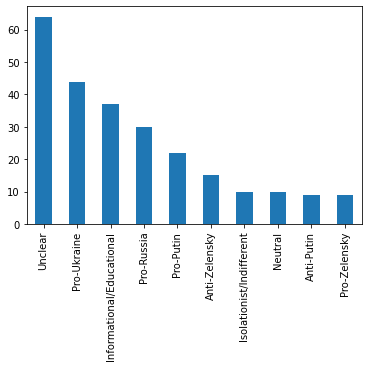

In [10]:
bulgaria_total_sentiment.plot(kind="bar")

<AxesSubplot:>

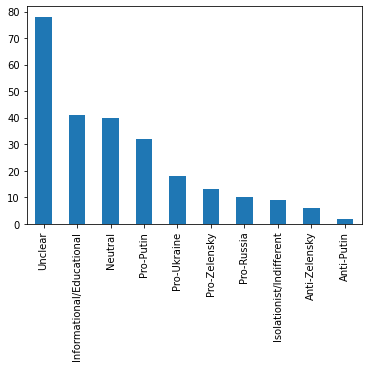

In [11]:
romania_total_sentiment.plot(kind="bar")

<AxesSubplot:>

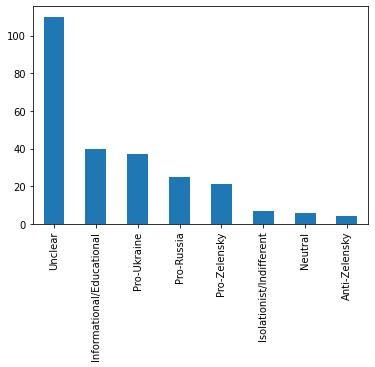

In [12]:
poland_total_sentiment.plot(kind="bar")

<AxesSubplot:>

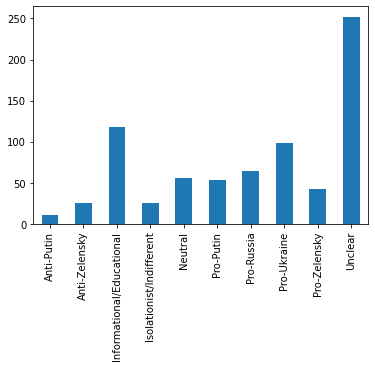

In [13]:
total.plot(kind="bar")

In [14]:
bulgarian_aggregate = sum_col(bulgarian_df, "Post_Sentiment")
romanian_aggregate = sum_col(romanian_df, "Post_Sentiment")
poland_aggregate = sum_col(poland_df, "Post_Sentiment")

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_hashtags_per_sentiment_custom_colors_ordered_legend(df, country_name):
    # Ensure handling of NaN and convert to string before splitting
    df['Hashtags_List'] = df['Hashtags_Used'].apply(lambda x: [tag.strip().lower() for tag in str(x).split('#') if tag.strip()])

    # Explode the DataFrame such that each hashtag gets its own row but retains the original post's sentiment
    exploded_df = df.explode('Hashtags_List')

    # Count Frequencies of Hashtags per Sentiment
    hashtag_sentiment_counts = exploded_df.groupby(['Post_Sentiment', 'Hashtags_List']).size().reset_index(name='Count')

    # Filter to show only the top 3 hashtags per sentiment category
    top_hashtags_per_sentiment = hashtag_sentiment_counts.sort_values(['Post_Sentiment', 'Count'], ascending=[True, False]) \
                                        .groupby('Post_Sentiment').head(3)

    # Define a custom color palette with distinct colors for each sentiment
    custom_palette = {
        'Pro-Russia': '#003f5c',
        'Pro-Putin': '#2f4b7c',
        'Anti-Zelensky': '#665191',
        'Isolationist/Indifferent': '#a05195',
        'Unclear': '#d45087',
        'Neutral': '#f95d6a',
        'Informational/Educational': '#ff7c43',
        'Anti-Putin': '#ffa600',
        'Pro-Zelensky': '#ff7c00',
        'Pro-Ukraine': '#ff6e00'
    }
    
    # Ensure the order of sentiments matches the desired color scheme
    sentiment_order = ['Pro-Russia', 'Pro-Putin', 'Anti-Zelensky', 'Isolationist/Indifferent', 'Unclear', 
                       'Neutral', 'Informational/Educational', 'Anti-Putin', 'Pro-Zelensky', 'Pro-Ukraine']

    # Apply the custom color palette to the barplot
    plt.figure(figsize=(14, 9))
    barplot = sns.barplot(x='Count', y='Hashtags_List', hue='Post_Sentiment', data=top_hashtags_per_sentiment,
                          palette=[custom_palette.get(x) for x in sentiment_order], hue_order=sentiment_order)
    plt.title(f'Top 3 Hashtags per Post Sentiment for {country_name}', fontsize=27)
    plt.xlabel('Frequency', fontsize=25, labelpad=20)
    plt.ylabel('Hashtags', fontsize=25)

    # Reorder the legend
    handles, labels = barplot.get_legend_handles_labels()
    ordered_handles = [handles[sentiment_order.index(lab)] for lab in labels if lab in sentiment_order]
    ordered_labels = [lab for lab in labels if lab in sentiment_order]
    plt.legend(ordered_handles, ordered_labels, title='Post Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

    barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=20)

    plt.tight_layout()
    plt.show()


C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/1695710829.py:52: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/1695710829.py:52: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/1695710829.py:52: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/1695710829.py:52: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  plt.tight_layout()
c:\Users\arnib\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\arnib\AppData\Loca

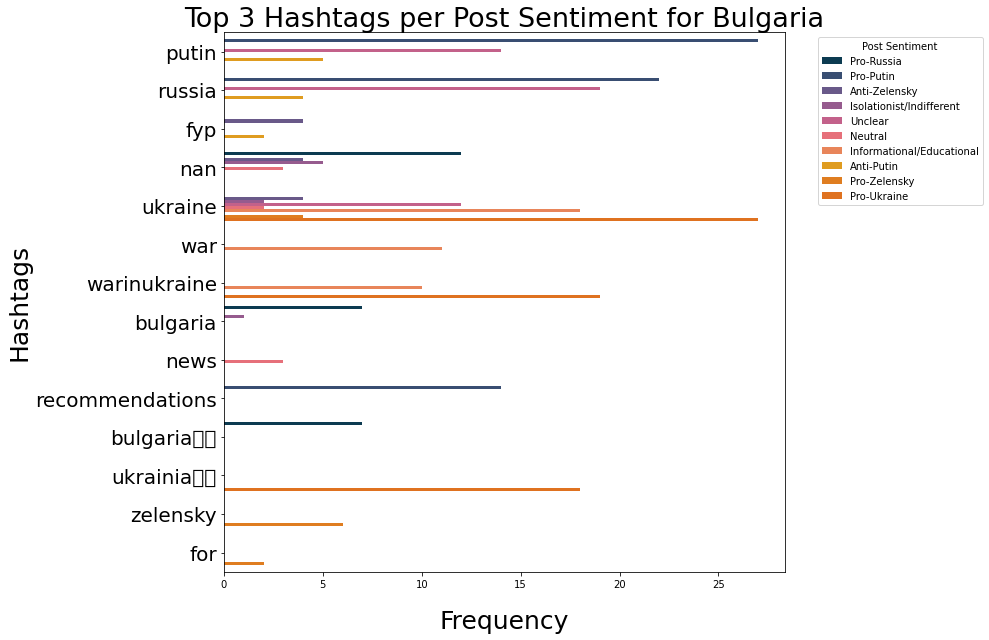

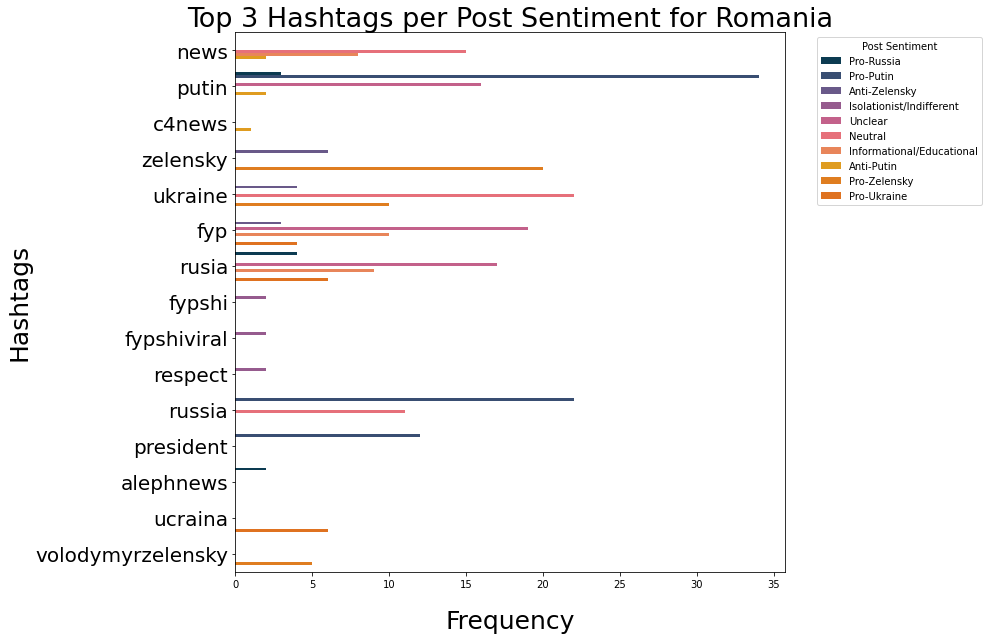

C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/1695710829.py:52: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/1695710829.py:52: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  plt.tight_layout()
c:\Users\arnib\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\arnib\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


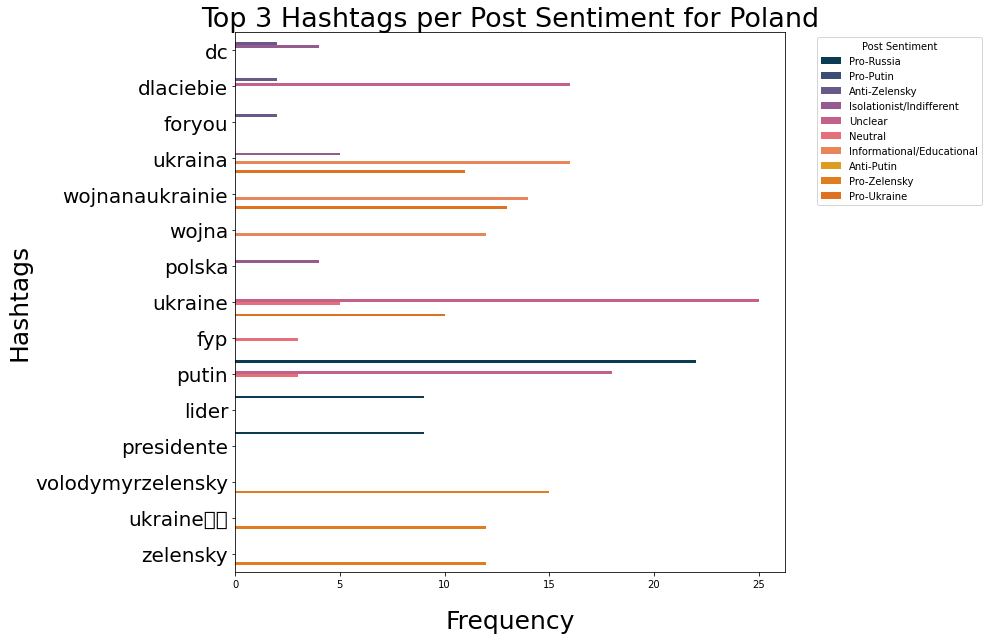

In [16]:
visualize_top_hashtags_per_sentiment_custom_colors_ordered_legend(bulgarian_df, 'Bulgaria')
visualize_top_hashtags_per_sentiment_custom_colors_ordered_legend(romanian_df, 'Romania')
visualize_top_hashtags_per_sentiment_custom_colors_ordered_legend(poland_df, 'Poland')


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualize_top_hashtags_across_countries(dfs, country_names):
    """
    Visualize the top 3 hashtags per sentiment across multiple countries in one combined image.
    
    Parameters:
    - dfs: List of DataFrames, each containing the raw data for a specific country.
    - country_names: List of country names corresponding to each DataFrame in `dfs`.
    """
    # Define custom color palette and sentiment order
    custom_palette = {
        'Pro-Russia': '#003f5c',
        'Pro-Putin': '#2f4b7c',
        'Anti-Zelensky': '#665191',
        'Isolationist/Indifferent': '#a05195',
        'Unclear': '#d45087',
        'Neutral': '#f95d6a',
        'Informational/Educational': '#ff7c43',
        'Anti-Putin': '#ffa600',
        'Pro-Zelensky': '#ff7c00',
        'Pro-Ukraine': '#ff6e00'
    }
    sentiment_order = ['Pro-Russia', 'Pro-Putin', 'Anti-Zelensky', 'Isolationist/Indifferent', 'Unclear', 
                       'Neutral', 'Informational/Educational', 'Anti-Putin', 'Pro-Zelensky', 'Pro-Ukraine']

    # Initialize the subplot figure
    fig, axes = plt.subplots(1, len(dfs), figsize=(20, 10))  # Adjust figsize as needed

    for ax, df, country_name in zip(axes, dfs, country_names):
        # Process each DataFrame
        df['Hashtags_List'] = df['Hashtags_Used'].apply(lambda x: [tag.strip().lower() for tag in str(x).split('#') if tag.strip()])
        exploded_df = df.explode('Hashtags_List')
        hashtag_sentiment_counts = exploded_df.groupby(['Post_Sentiment', 'Hashtags_List']).size().reset_index(name='Count')
        top_hashtags_per_sentiment = hashtag_sentiment_counts.sort_values(['Post_Sentiment', 'Count'], ascending=[True, False]).groupby('Post_Sentiment').head(3)
        
        # Plotting
        sns.barplot(x='Count', y='Hashtags_List', hue='Post_Sentiment', data=top_hashtags_per_sentiment,
                    palette=[custom_palette.get(x) for x in sentiment_order], hue_order=sentiment_order, ax=ax)
        ax.set_title(f'{country_name}', fontsize=20)
        ax.set_xlabel('Frequency', fontsize=18)
        ax.set_ylabel('Hashtags', fontsize=18)

        # Conditionally set y-axis label
        if i == 0:  # Only for the first subplot
            ax.set_ylabel('Hashtags', fontsize=18)
        else:
            ax.set_ylabel('')  # No y-axis label for other subplots
        
        ax.legend().set_visible(False)  # Hide legend to avoid repetition

        # Adjust tick labels
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
    
    # Add a single legend outside the last subplot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', title='Post Sentiment', fontsize=14, bbox_to_anchor=(1.1, 1))

    plt.tight_layout()
    plt.show()


In [32]:
def visualize_top_hashtags_across_countries(dfs, country_names):
    """
    Visualize the top 3 hashtags per sentiment across multiple countries in one combined image,
    displaying the y-axis label only on the first chart.
    
    Parameters:
    - dfs: List of DataFrames, each containing the raw data for a specific country.
    - country_names: List of country names corresponding to each DataFrame in `dfs`.
    """
    # Define custom color palette and sentiment order
    custom_palette = {
        'Pro-Russia': '#003f5c',
        'Pro-Putin': '#2f4b7c',
        'Anti-Zelensky': '#665191',
        'Isolationist/Indifferent': '#a05195',
        'Unclear': '#d45087',
        'Neutral': '#f95d6a',
        'Informational/Educational': '#ff7c43',
        'Anti-Putin': '#ffa600',
        'Pro-Zelensky': '#ff7c00',
        'Pro-Ukraine': '#ff6e00'
    }
    sentiment_order = ['Pro-Russia', 'Pro-Putin', 'Anti-Zelensky', 'Isolationist/Indifferent', 'Unclear', 
                       'Neutral', 'Informational/Educational', 'Anti-Putin', 'Pro-Zelensky', 'Pro-Ukraine']

    sns.set(font_scale=1.5)  # Increase seaborn font scale for larger text
    
    fig, axes = plt.subplots(1, len(dfs), figsize=(20, 10))  # Adjust figsize as needed

    for i, (df, country_name) in enumerate(zip(dfs, country_names)):
        ax = axes[i]
        # Process DataFrame
        df['Hashtags_List'] = df['Hashtags_Used'].apply(lambda x: [tag.strip().lower() for tag in str(x).split('#') if tag.strip()])
        exploded_df = df.explode('Hashtags_List')
        hashtag_sentiment_counts = exploded_df.groupby(['Post_Sentiment', 'Hashtags_List']).size().reset_index(name='Count')
        top_hashtags_per_sentiment = hashtag_sentiment_counts.sort_values(['Post_Sentiment', 'Count'], ascending=[True, False]).groupby('Post_Sentiment').head(3)
        
        # Plotting
        sns.barplot(x='Count', y='Hashtags_List', hue='Post_Sentiment', data=top_hashtags_per_sentiment,
                    palette=[custom_palette.get(x) for x in sentiment_order], hue_order=sentiment_order, ax=ax)
        ax.set_title(f'{country_name}', fontsize=20)
        ax.set_xlabel('Frequency', fontsize=18)
        
        # Conditionally set y-axis label
        if i == 0:  # Only for the first subplot
            ax.set_ylabel('Hashtags', fontsize=18)
        else:
            ax.set_ylabel('')  # No y-axis label for other subplots
        
        ax.legend().set_visible(False)  # Hide legend to avoid repetition

        # Adjust tick labels
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
    
    # Add a single legend outside the last subplot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', title='Post Sentiment', fontsize=14, bbox_to_anchor=(1.1, 1))

    plt.tight_layout()
    plt.show()

# Ensure you define `custom_palette` and `sentiment_order` before calling this function.
# visualize_top_hashtags_across_countries([bulgaria_df, romania_df, poland_df], ['Bulgaria', 'Romania', 'Poland'])


C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/4244409739.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/4244409739.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/4244409739.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/4244409739.py:60: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipykernel_24980/4244409739.py:60: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  plt.tight_layout()
C:\Users\arnib\AppData\Local\Temp/ipy

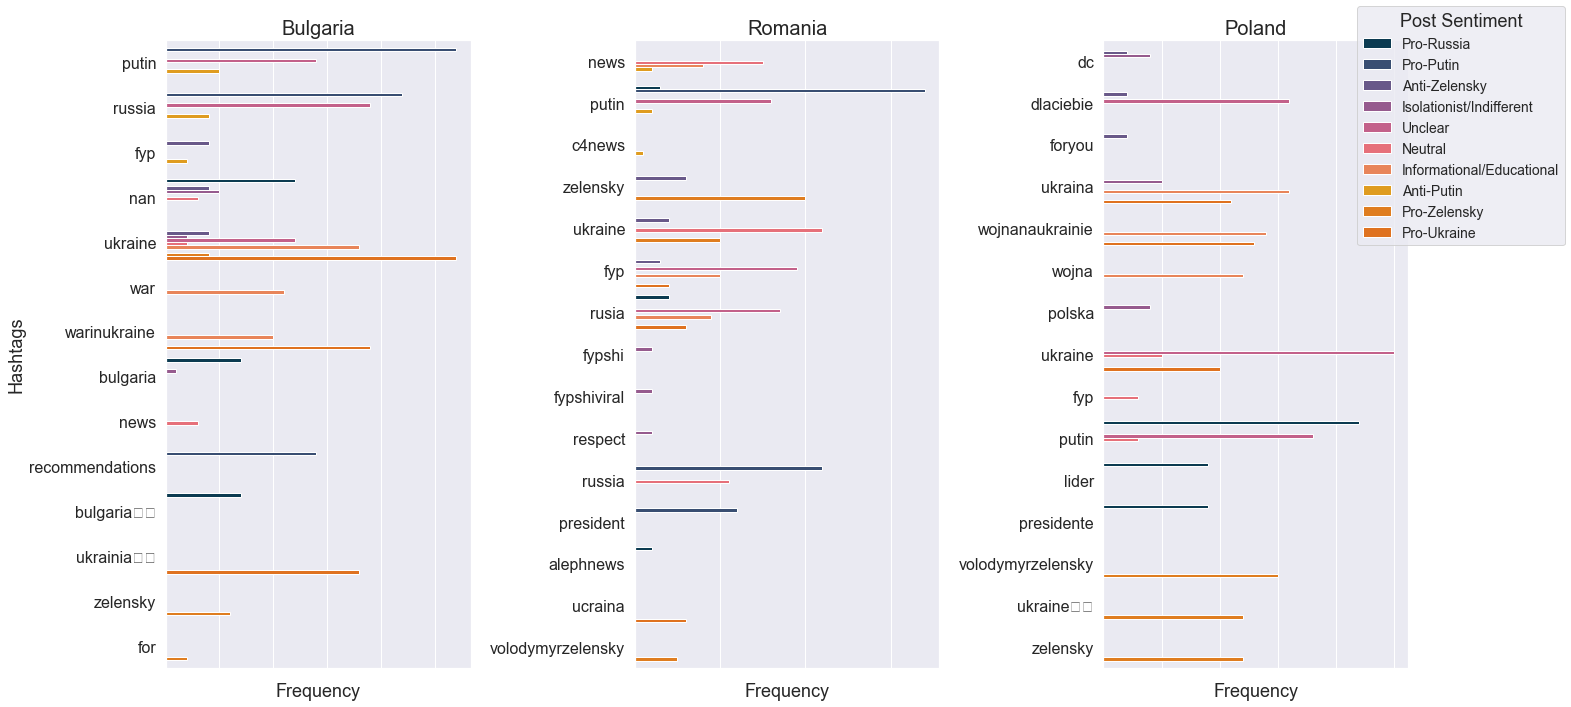

In [33]:
# Example usage
# Assuming you have the DataFrames bulgaria_df, romania_df, and poland_df loaded
visualize_top_hashtags_across_countries([bulgarian_df, romanian_df, poland_df], ['Bulgaria', 'Romania', 'Poland'])

In [17]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Bulgaria
- Pro-Ukraine: The top hashtags include '#ukraine', '#warinukraine', and '#ukrainia🇺🇦', indicating a focus on the Ukrainian perspective and the war.
    
- Unclear: Hashtags such as '#russia', '#putin', and '#ukraine' are prevalent, reflecting a mix of topics without a clear stance.
    
- Informational/Educational: Includes '#ukraine', '#war', and '#warinukraine', suggesting a focus on providing information about the conflict.
    
- Pro-Russian: Features '#warinukraine', '#ukraine', and '#muraev', indicating discussions around the war and specific figures.
    
- Pro-Putin: Dominated by hashtags like '#putin' and '#russia', showing strong support for the Russian president.
    
- Anti-Putin and Anti-Zelensky: Both sentiments use direct references to the leaders ('#putin', '#zelensky') with negative connotations or criticism.
    
- Pro-Zelensky: Shows support with hashtags like '#zelensky' and '#ukrainiantiktok'.
    
- Neutral and Isolationist/Indifferent: Either non-specific ('#nan', '#news') or indicating a lack of clear stance towards the conflict.
    
- Pro-Russia: Interestingly, this sentiment includes non-specific hashtags ('#nan') and references to Bulgaria, indicating localized discussions or perspectives.

### Romania
- Neutral: Common hashtags include '#ukraine', '#news', and '#russia', indicating a focus on news-related content.
    
- Informational/Educational: '#fyp', '#rusia', and '#news' are prevalent, suggesting informational content.
    
- Isolationist/Indifferent: Hashtags like '#fypshiviral' and '#fypshi' indicate a general or varied content focus.
    
- Unclear: '#fyp', '#rusia', '#ukraine', and '#putin' are common, showing mixed or general content.
    
- Pro-Ukraine: Includes '#ucraina', '#rusia', and '#fyp', reflecting support for Ukraine.
    
- Pro-Russia: '#rusia', '#putin', '#alephnews' indicate a pro-Russia stance.
    
- Anti-Putin: Hashtags include '#news' and '#putin', suggesting criticism.
    
- Pro-Putin: Dominated by '#putin', '#russia', and '#president', showing strong support for Putin.
    
- Pro-Zelensky: '#zelensky' and '#ukraine' are key, indicating support for Zelensky.
    
- Anti-Zelensky: Includes '#zelensky' and '#ukraine', but with a negative sentiment.

### Poland    
- Unclear: Features hashtags like '#ukraine', '#putin', and '#dlaciebie', indicating varied or general content.
    
- Informational/Educational: '#ukraina', '#wojnanaukrainie', and '#wojna' are common, suggesting a focus on the conflict.
    
- Isolationist/Indifferent: Unique hashtags such as '#rolnik' and '#rolnictwo', which are unrelated to the conflict, indicating diverse content.
    
- Pro-Ukraine: Includes '#wojnanaukrainie', '#ukraina', and '#wojna', showing support for Ukraine.
    
- Pro-Russia: Dominated by '#putin' and '#lider', indicating support for Russia.
    
- Pro-Zelensky: Features '#volodymyrzelensky' and '#ukraine🇺🇦', showing support for Zelensky.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def generate_heatmap_with_enhancements(df, country_name):
    """
    Generate a heatmap for comment sentiment alignment by post sentiment with visual enhancements.
    
    Parameters:
    - df: DataFrame containing the raw data for a specific country.
    - country_name: String representing the name of the country.
    """
    # Ensure Seaborn and Matplotlib settings for font size are increased
    sns.set(font_scale=1.5)  # Increase seaborn font scale for larger text
    #plt.rcParams.update({'font.size': 14})  # Adjust matplotlib font size
    
    # Categorize Comment Sentiment Alignment
    conditions = [
        (df['Comments_Sentiment'] == 'Agreement'),
        (df['Comments_Sentiment'] == 'Disagreement'),
        (df['Comments_Sentiment'] == 'Mixed Reaction'),
    ]
    choices = ['Agreement', 'Disagreement', 'Mixed Reaction']
    df['Comment_Sentiment_Alignment'] = np.select(conditions, choices, default='Neutral/Unrelated')
    
    # Aggregate Data by Post Sentiment and Comment Sentiment Alignment
    alignment_aggregation = df.groupby('Post_Sentiment')['Comment_Sentiment_Alignment'].value_counts().unstack(fill_value=0)
    
    # Normalize the aggregated data for proportional representation
    normalized_data = alignment_aggregation.div(alignment_aggregation.sum(axis=1), axis=0)
    
    # Create the heatmap with lines and enhanced fonts
    plt.figure(figsize=(12, 14))
    ax = sns.heatmap(normalized_data, annot=True, cmap='rocket_r', fmt=".2f", linewidths=.5, linecolor='gray')
    ax.set_title(f'Sentiment Alignment Heatmap for {country_name}', weight="bold", fontsize=30, pad=25)
    ax.set_xlabel('Sentiment Alignment', labelpad=25, weight="bold", fontsize=30)
    ax.set_ylabel('Post Sentiment', weight="bold", fontsize=30)

    # Adjust x-axis labels if needed
    labels = ax.get_yticklabels()
    y_new_labels = [label.get_text().replace('Informational/Educational', 'Educational').replace('Isolationist/Indifferent', 'Isolationist') for label in labels]
    ax.set_yticklabels(y_new_labels, ha='right', fontsize=25)
    
    labels = ax.get_xticklabels()
    x_new_labels = [label.get_text().replace('Mixed Reaction', 'Mixed')for label in labels]
    ax.set_xticklabels(labels=x_new_labels, fontsize=25, rotation=15)

    plt.tight_layout()
    plt.show()


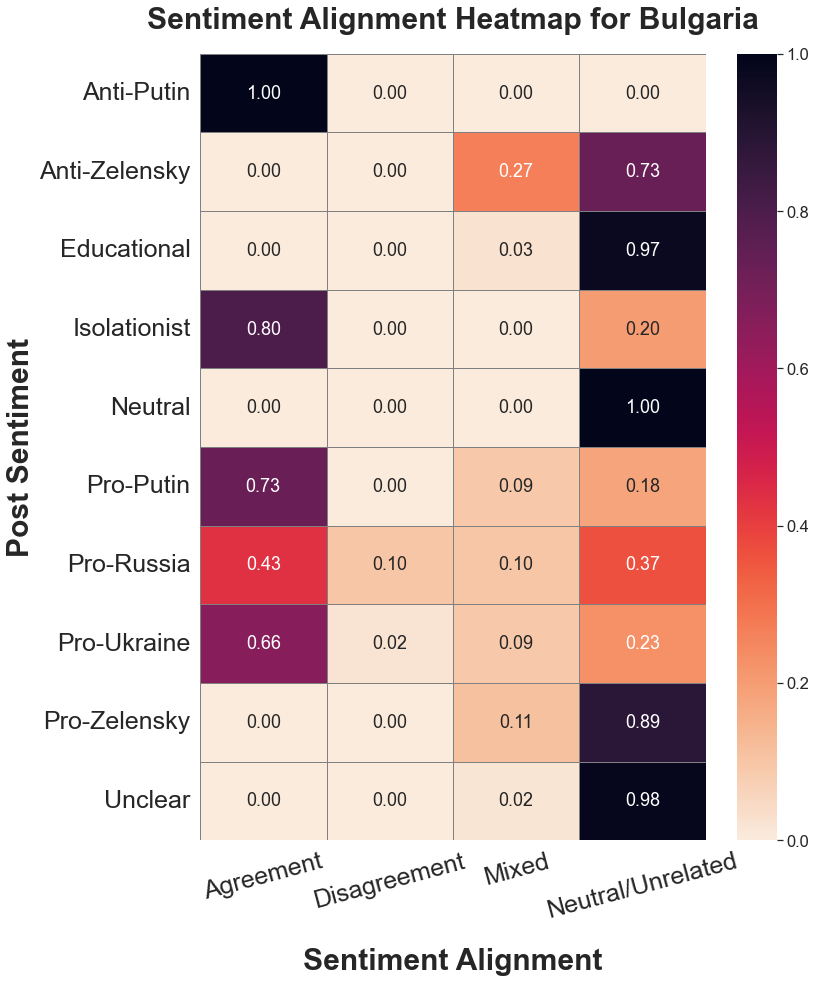

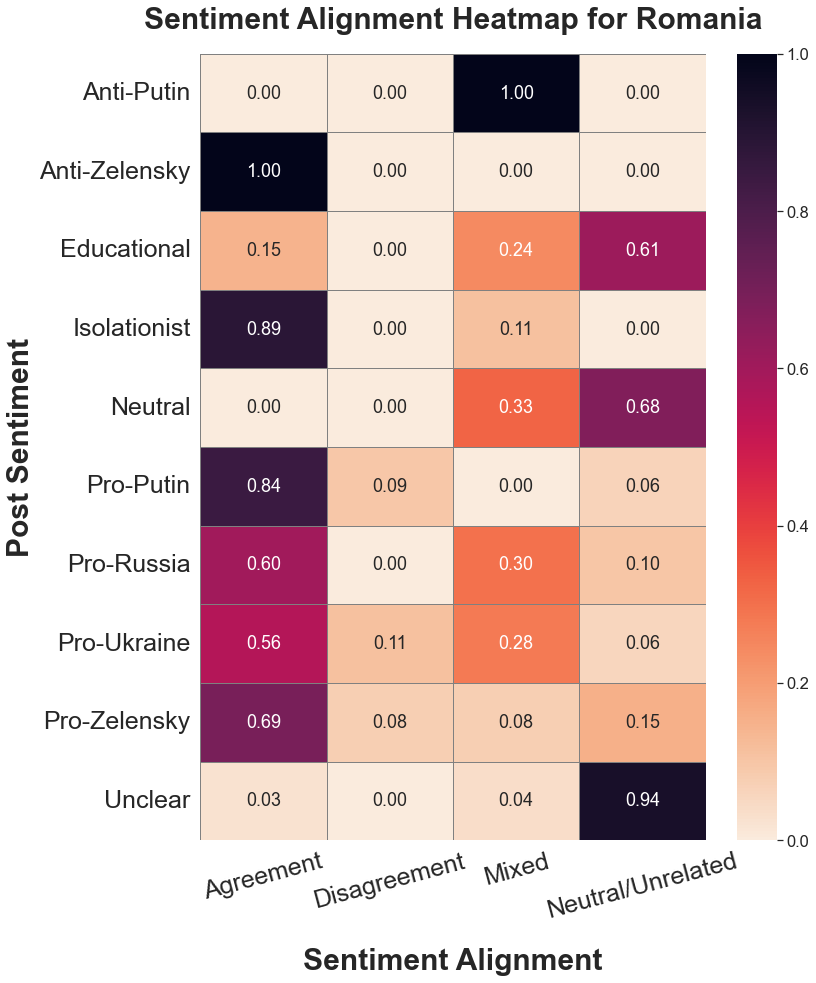

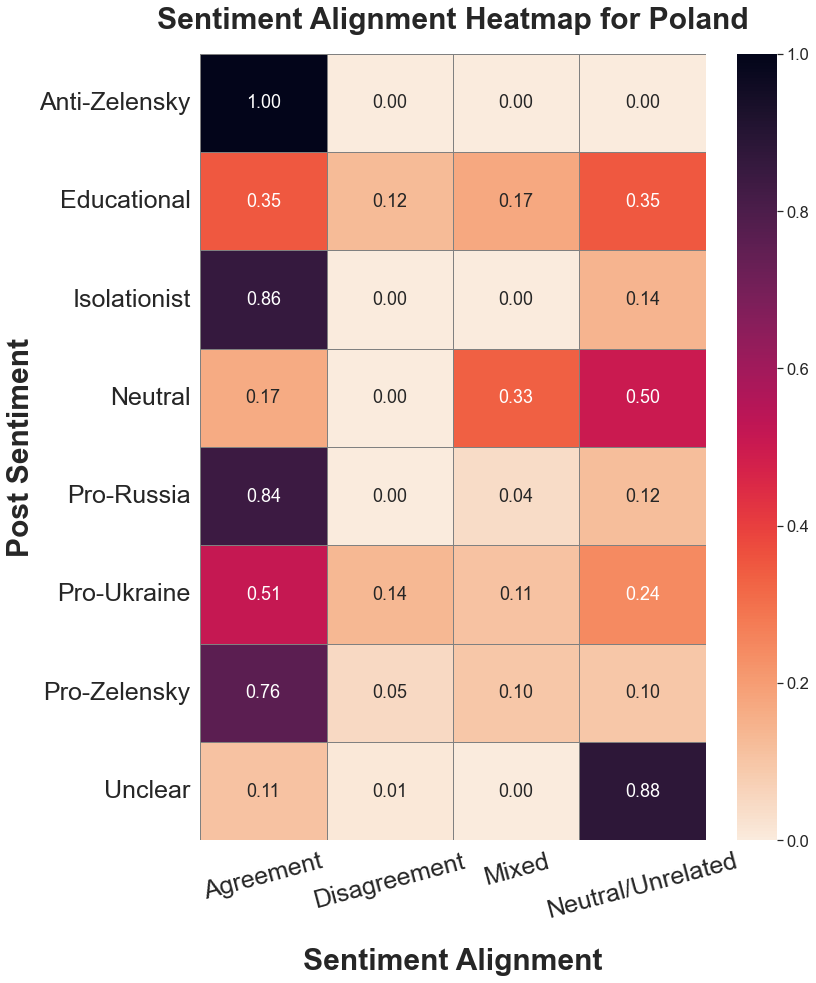

In [19]:
generate_heatmap_with_enhancements(bulgarian_df, 'Bulgaria')
generate_heatmap_with_enhancements(romanian_df, "Romania")
generate_heatmap_with_enhancements(poland_df, "Poland")

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def generate_combined_heatmaps(dfs, country_names):
    """
    Generate combined heatmaps for comment sentiment alignment by post sentiment across multiple countries with visual enhancements.
    
    Parameters:
    - dfs: List of DataFrames containing the raw data for each country.
    - country_names: List of strings representing the names of the countries.
    """
    sns.set(font_scale=1.5)  # Increase seaborn font scale for larger text
    
    fig, axes = plt.subplots(1, len(dfs), figsize=(36, 12))  # Adjust figsize as needed
    
    for ax, df, country_name in zip(axes, dfs, country_names):
        # Categorize Comment Sentiment Alignment
        conditions = [
            (df['Comments_Sentiment'] == 'Agreement'),
            (df['Comments_Sentiment'] == 'Disagreement'),
            (df['Comments_Sentiment'] == 'Mixed Reaction'),
        ]
        choices = ['Agreement', 'Disagreement', 'Mixed Reaction']
        df['Comment_Sentiment_Alignment'] = np.select(conditions, choices, default='Neutral/Unrelated')
        
        # Aggregate Data by Post Sentiment and Comment Sentiment Alignment
        alignment_aggregation = df.groupby('Post_Sentiment')['Comment_Sentiment_Alignment'].value_counts().unstack(fill_value=0)
        
        # Normalize the aggregated data for proportional representation
        normalized_data = alignment_aggregation.div(alignment_aggregation.sum(axis=1), axis=0)
        
        # Create the heatmap
        sns.heatmap(normalized_data, annot=True, cmap='rocket_r', fmt=".2f", linewidths=.5, linecolor='gray', ax=ax)
        ax.set_title(f'{country_name}', weight="bold", fontsize=25, pad=20)
        ax.set_xlabel('Sentiment Alignment', labelpad=15, weight="bold", fontsize=25)
        
        if ax == axes[0]:  # Only set ylabel for the first subplot to avoid repetition
            ax.set_ylabel('Post Sentiment', weight="bold", fontsize=25)
        else:
            ax.set_ylabel('')

        # Adjust tick labels
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=45)
    
    plt.tight_layout()
    plt.show()

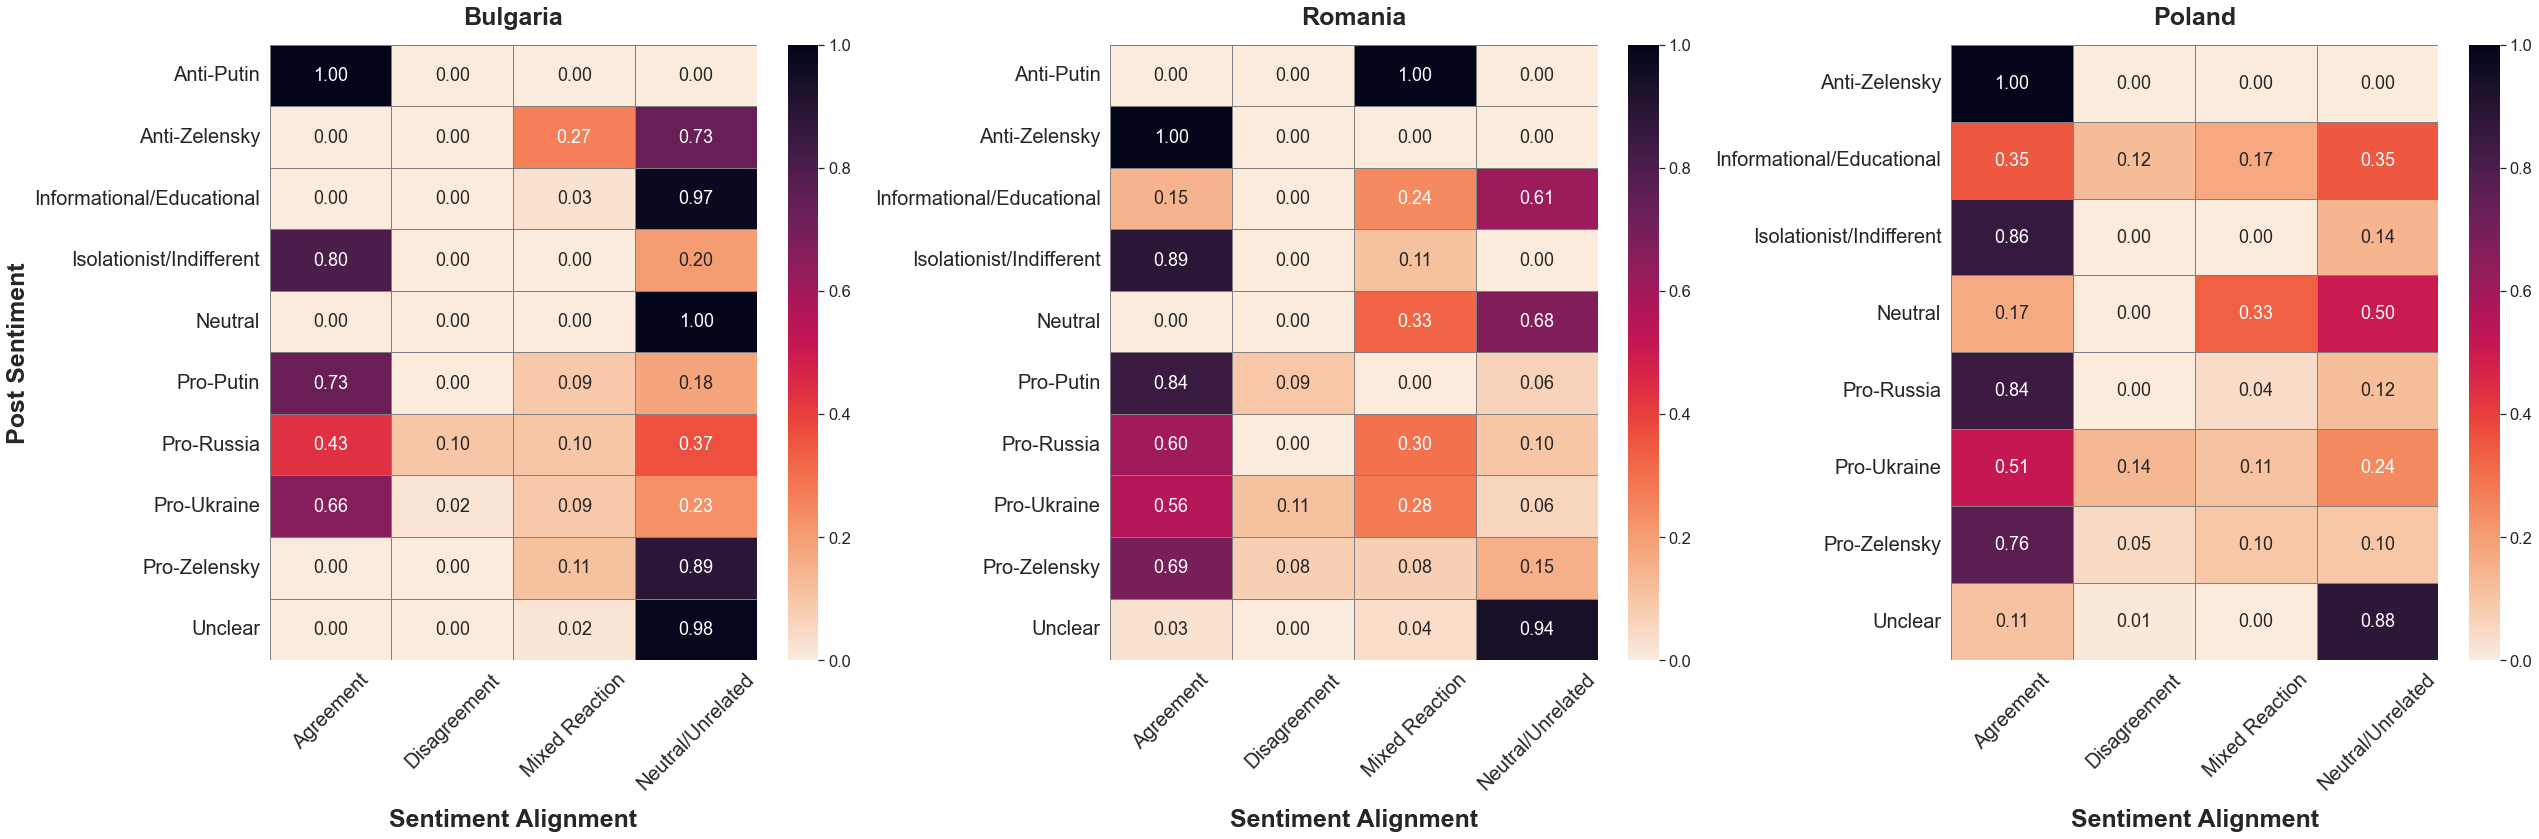

In [27]:
# Assuming you have loaded your dataframes for Bulgaria, Romania, and Poland as bulgaria_df, romania_df, poland_df
generate_combined_heatmaps([bulgarian_df, romanian_df, poland_df], ['Bulgaria', 'Romania', 'Poland'])

In [25]:
def engagement_vs_sentiment_boxplots(df, country_name):
    """
    Generate box plots to analyze the distribution of engagement metrics (likes, comments, views)
    for each post sentiment category.
    
    Parameters:
    - df: DataFrame containing the posts' data, including engagement metrics and sentiment.
    - country_name: The name of the country for labeling purposes in the visualization.
    """
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Views vs Sentiment
    sns.boxplot(x='Post_Sentiment', y='Num_Views', data=df, ax=axs[2], palette='Set3')
    axs[0].set_title(f'Views by Post Sentiment in {country_name}')
    axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
    axs[0].set_yscale('log')  # Use logarithmic scale if data varies greatly

    # Likes vs Sentiment
    sns.boxplot(x='Post_Sentiment', y='Num_Likes', data=df, ax=axs[0], palette='Pastel1')
    axs[1].set_title(f'Likes by Post Sentiment in {country_name}')
    axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")
    axs[1].set_yscale('log')  # Use logarithmic scale if data varies greatly
    
    # Comments vs Sentiment
    sns.boxplot(x='Post_Sentiment', y='Num_Comments', data=df, ax=axs[1], palette='Pastel2')
    axs[2].set_title(f'Comments by Post Sentiment in {country_name}')
    axs[2].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha="right")
    axs[2].set_yscale('log')  # Use logarithmic scale if data varies greatly
    
    plt.tight_layout()
    plt.show()

C:\Users\arnib\AppData\Local\Temp/ipykernel_268/3740326531.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
C:\Users\arnib\AppData\Local\Temp/ipykernel_268/3740326531.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


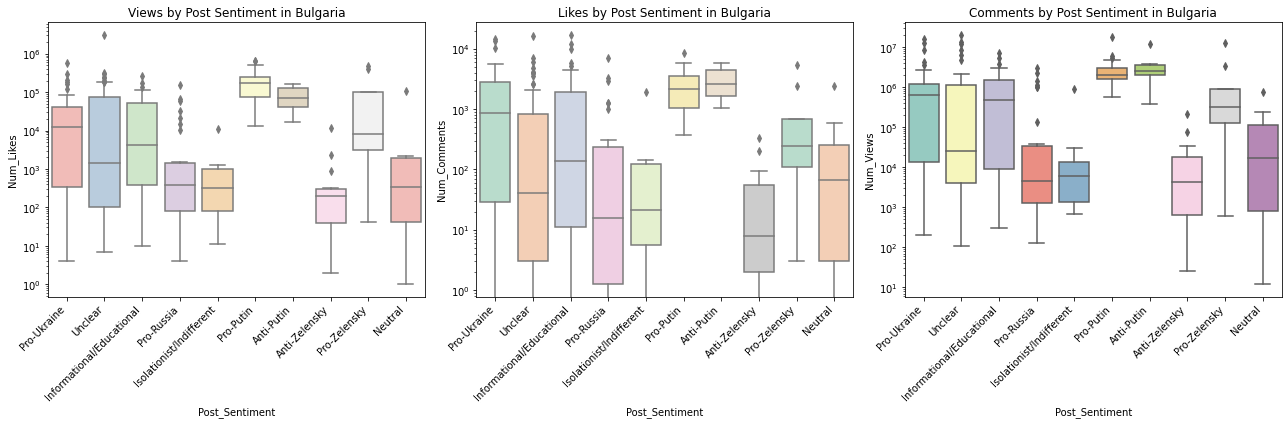

In [26]:
engagement_vs_sentiment_boxplots(bulgarian_df, "Bulgaria")

C:\Users\arnib\AppData\Local\Temp/ipykernel_268/3740326531.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
C:\Users\arnib\AppData\Local\Temp/ipykernel_268/3740326531.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


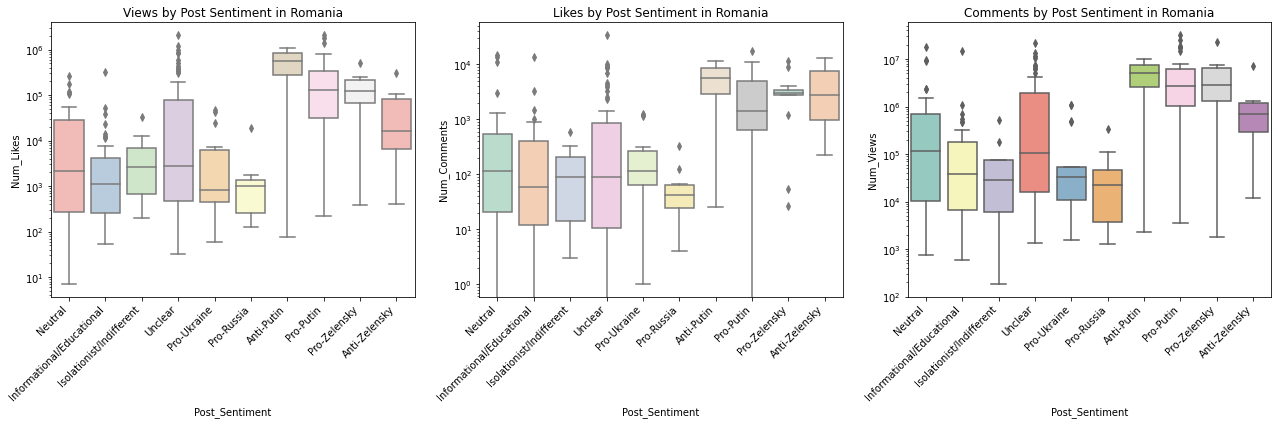

In [27]:
engagement_vs_sentiment_boxplots(romanian_df, "Romania")

C:\Users\arnib\AppData\Local\Temp/ipykernel_268/3740326531.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha="right")
C:\Users\arnib\AppData\Local\Temp/ipykernel_268/3740326531.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")


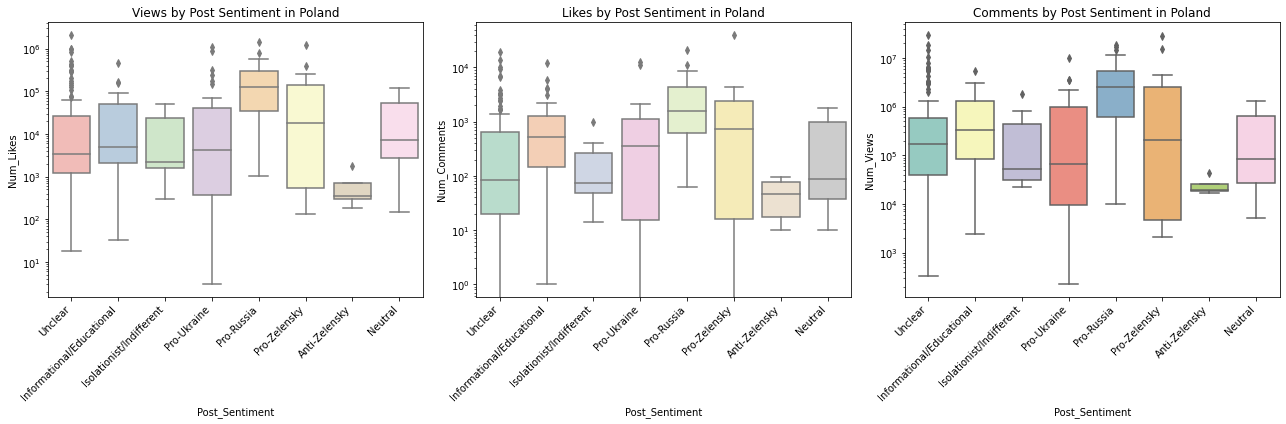

In [28]:
engagement_vs_sentiment_boxplots(poland_df, "Poland")

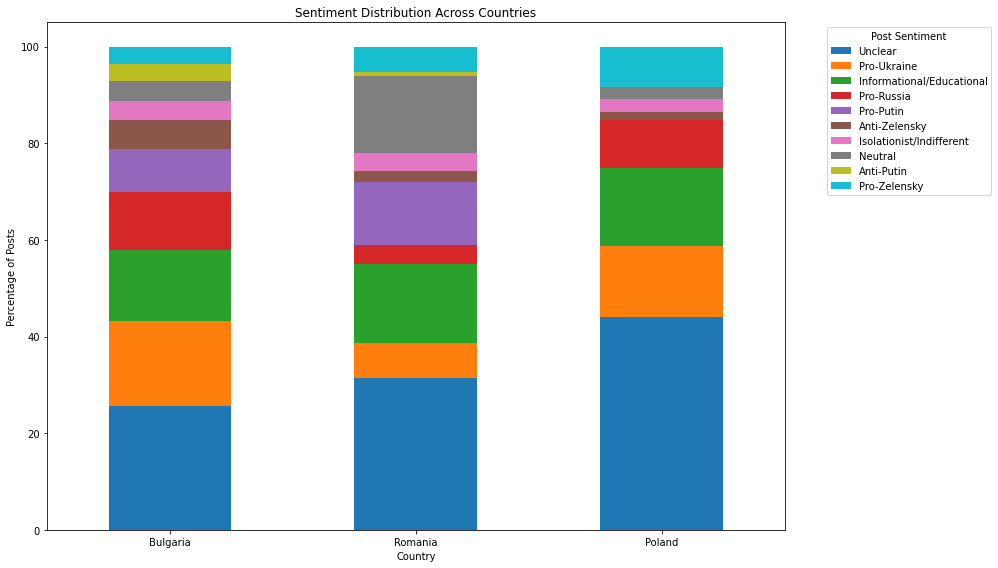

In [29]:
# Assuming sheets_dict is a dictionary with keys being country names and values being the respective DataFrames
sheets_dict = {'Bulgaria': bulgarian_df, 'Romania': romanian_df, 'Poland': poland_df}

# Step 2 & 3: Aggregate sentiment data and combine
sentiment_distribution_across_countries = pd.DataFrame()

for country, df in sheets_dict.items():
    sentiment_distribution = df['Post_Sentiment'].value_counts(normalize=True) * 100
    sentiment_distribution_across_countries[country] = sentiment_distribution

# Transpose for easier plotting
sentiment_distribution_across_countries = sentiment_distribution_across_countries.transpose()

# Step 4: Visualize
sentiment_distribution_across_countries.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Sentiment Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.legend(title='Post Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()